# Electronics Sales Analysis

Import libraries & data 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
os.chdir("C:\\Users\ywjra\Desktop\Operation Analyst Exercise\Pandas-Data-Science-Tasks-master\Sales_Data")

In [2]:
# Import data
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
combined_csv.to_csv("combined_csv.csv", index=False, encoding='utf-8-sig')

df = combined_csv
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


Data Cleaning

In [3]:
# Removing NaN rows
nan_df = combined_csv[combined_csv.isna().any(axis=1)]
display(nan_df.head())

df = combined_csv.dropna(how='all')
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [4]:
# Remove duplicates based on repitition of Order ID & Product
df = df.drop_duplicates(subset=['Order ID', 'Product'])

In [5]:
# Check data type
df.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

In [6]:
# Change data type for Order Date, Quantity Ordered & Price Each
df = df[df['Order Date'].str[0:2]!='Or']
df['Quantity Ordered'] = (df['Quantity Ordered']).astype(int)
df['Price Each'] = (df['Price Each']).astype(float)
pd.options.mode.chained_assignment = None 
df.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

In [7]:
# Add month column
df['Month'] = pd.to_datetime(df['Order Date']).dt.month
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [8]:
# Split Street, City, State & Zip code
df[['Street', 'City', 'State']] = df['Purchase Address'].str.split(',', expand=True)
df['Zip_Code'] = df['State'].str[-5:]
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Street,City,State,Zip_Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,917 1st St,Dallas,TX 75001,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,682 Chestnut St,Boston,MA 02215,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,669 Spruce St,Los Angeles,CA 90001,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,669 Spruce St,Los Angeles,CA 90001,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,333 8th St,Los Angeles,CA 90001,90001


In [9]:
# Remove Zipcode in State column
df['State'] = df['State'].str.replace('\d+' , '', regex=True)
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Street,City,State,Zip_Code
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,917 1st St,Dallas,TX,75001
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,682 Chestnut St,Boston,MA,02215
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,669 Spruce St,Los Angeles,CA,90001
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,669 Spruce St,Los Angeles,CA,90001
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,333 8th St,Los Angeles,CA,90001
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,840 Highland St,Los Angeles,CA,90001
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,216 Dogwood St,San Francisco,CA,94016
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,220 12th St,San Francisco,CA,94016
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,511 Forest St,San Francisco,CA,94016


In [10]:
# Remove Street column
df = df.drop(columns=['Street', 'Zip_Code'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA


In [11]:
# Sort by Month
df.sort_values(by=['Month', 'Order ID'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,Los Angeles,CA
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,San Francisco,CA
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,San Francisco,CA
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,San Francisco,CA


Data Exploration

> 1 - Highest Sales by month in 2019 

In [12]:
# Sum total sales for each transaction
df['Total Sales'] = df['Quantity Ordered'].astype('int') * df['Price Each'].astype('float') 
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99


In [13]:
Total_Monthly_Sales = df[['Month', 'Quantity Ordered', 'Price Each', 'Total Sales']] 
Total_Monthly_Sales.groupby(['Month']).sum()

,Quantity Ordered,Price Each,Total Sales
Month,,,
1,10893,1810924.81,1821413.16
2,13425,2186904.50,2200012.30
3,16976,2789065.86,2804954.57
4,20532,3366208.09,3389203.47
5,18641,3133079.92,3150537.62
6,15232,2560488.56,2576265.21
7,16051,2631210.18,2646434.43
8,13418,2226945.55,2241042.83
9,13090,2081885.66,2094453.70


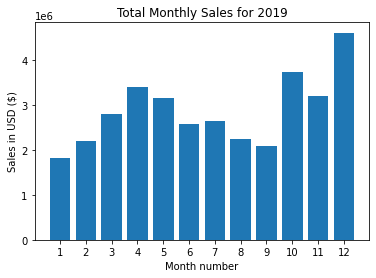

In [14]:
#Plotting Bar Chart
months = range(1,13)

plt.title("Total Monthly Sales for 2019")
plt.bar(months,Total_Monthly_Sales.groupby(['Month']).sum()['Total Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month number')
plt.show()

> 2 - Best Selling Product in 2019

In [15]:
# Count products sold
counts = df['Product'].value_counts()
counts

USB-C Charging Cable          21855
Lightning Charging Cable      21604
AAA Batteries (4-pack)        20593
AA Batteries (4-pack)         20542
Wired Headphones              18847
Apple Airpods Headphones      15525
Bose SoundSport Headphones    13298
27in FHD Monitor               7498
iPhone                         6840
27in 4K Gaming Monitor         6225
34in Ultrawide Monitor         6174
Google Phone                   5522
Flatscreen TV                  4794
Macbook Pro Laptop             4721
ThinkPad Laptop                4126
20in Monitor                   4098
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

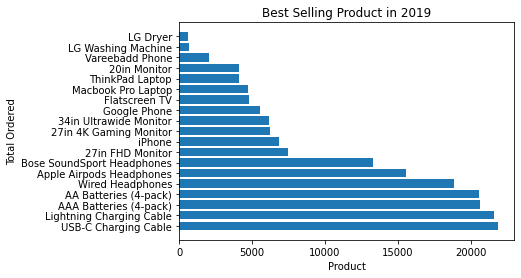

In [16]:
# Plotting horizontal bar chart

plt.title('Best Selling Product in 2019')
plt.barh(counts.index, df['Product'].value_counts())
plt.yticks(ticks=counts.index)
plt.xlabel('Product')
plt.ylabel('Total Ordered')
plt.show()

> 3 - Highest Total Sales by State in 2019

In [17]:
df.groupby(['State']).sum()

#df.rename('State') = (['CA':'California (CA)', 'GA':'Georgia (GA)', 'MA':'Massachusetts (MA)', 'ME':'Maine (ME)', 'NY':'New York (NY)', 'OR':'Oregon (OR)', 'TX':'Texas (TX)', 'WA':'Washington (WA)'], inplace = True)

,Quantity Ordered,Price Each,Month,Total Sales
State,,,,
CA,83386,13621094.10,522839,13702909.49
GA,16582,2778589.90,104629,2794180.28
MA,22486,3634365.95,140854,3658576.41
ME,2745,446740.37,17110,449309.39
NY,27889,4632876.14,175503,4661785.60
OR,11285,1859811.67,70492,1869967.85
TX,27831,4558310.87,174119,4583326.03
WA,16526,2730573.74,104791,2745020.40


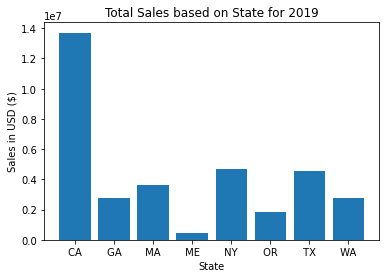

In [18]:
keys = [city for city, df in df.groupby(['State'])]

plt.title("Total Sales based on State for 2019")
plt.bar(keys,df.groupby(['State']).sum()['Total Sales'])
plt.xlabel('State')
plt.ylabel('Sales in USD ($)')
plt.xticks(keys)
plt.show()

> 4 - Best timing for buyer's engagement in increasing sales thru Ads

In [19]:
df['Hour'] = pd.to_datetime(df['Order Date']).dt.hour
df['Minute'] = pd.to_datetime(df['Order Date']).dt.minute
df['Count'] = 1
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total Sales,Hour,Minute,Count
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,Dallas,TX,23.90,8,46,1
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,Boston,MA,99.99,22,30,1
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,600.00,14,38,1
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,14,38,1
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,Los Angeles,CA,11.99,9,27,1


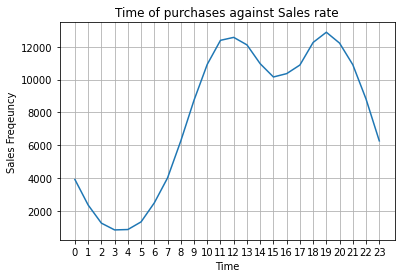

In [20]:
#Plotting graph
keys = [pair for pair, df in df.groupby(['Hour'])]

plt.title("Time of purchases against Sales rate")
plt.plot(keys, df.groupby(['Hour']).count()['Count'])
plt.xticks(keys)
plt.xlabel('Time')
plt.ylabel('Sales Freqeuncy')
plt.grid()
plt.show()

> 5 - Highest product sold together in pairs

In [21]:
df = df.sort_values(['Order ID', 'Total Sales'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total Sales,Hour,Minute,Count
67547,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,MA,700.00,21,25,1
67548,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,OR,14.95,14,15,1
67549,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,CA,23.98,13,33,1
67550,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,CA,149.99,20,33,1
67551,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,TX,11.99,11,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55506,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco,CA,14.95,20,58,1
55507,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles,CA,7.68,12,1,1
55508,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,Seattle,WA,400.00,6,43,1
55509,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,Dallas,TX,11.99,10,39,1


In [22]:
# Grouping same Order ID with different Product
Product_Pairs = df[df['Order ID'].duplicated(keep=False)]
Product_Pairs['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))
Product_Pairs
#df = df.drop(columns=['Grouped'])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total Sales,Hour,Minute,Count
67547,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston,MA,700.00,21,25,1
67548,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland,OR,14.95,14,15,1
67549,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco,CA,23.98,13,33,1
67550,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles,CA,149.99,20,33,1
67551,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin,TX,11.99,11,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55506,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",12,San Francisco,CA,14.95,20,58,1
55507,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",12,Los Angeles,CA,7.68,12,1,1
55508,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",12,Seattle,WA,400.00,6,43,1
55509,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",12,Dallas,TX,11.99,10,39,1


In [23]:
# Removing duplicates by strike off 1 of the identical Order ID
df1 = Product_Pairs.drop_duplicates(subset=['Order ID'])
df1

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,State,Total Sales,Hour,Minute,Count,Grouped
67588,141275,USB-C Charging Cable,1,11.95,01/07/19 16:06,"610 Walnut St, Austin, TX 73301",1,Austin,TX,11.95,16,6,1,"USB-C Charging Cable, Wired Headphones"
67605,141290,AA Batteries (4-pack),3,3.84,01/02/19 08:25,"4 1st St, Los Angeles, CA 90001",1,Los Angeles,CA,11.52,8,25,1,"AA Batteries (4-pack), Apple Airpods Headphones"
67681,141365,Wired Headphones,1,11.99,01/10/19 11:19,"20 Dogwood St, New York City, NY 10001",1,New York City,NY,11.99,11,19,1,"Wired Headphones, Vareebadd Phone"
67701,141384,USB-C Charging Cable,1,11.95,01/03/19 00:14,"223 Jackson St, Boston, MA 02215",1,Boston,MA,11.95,0,14,1,"USB-C Charging Cable, Google Phone"
67768,141450,Bose SoundSport Headphones,1,99.99,01/12/19 11:16,"521 Park St, San Francisco, CA 94016",1,San Francisco,CA,99.99,11,16,1,"Bose SoundSport Headphones, Google Phone"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55372,319536,Wired Headphones,1,11.99,12/16/19 09:59,"346 Elm St, Seattle, WA 98101",12,Seattle,WA,11.99,9,59,1,"Wired Headphones, Macbook Pro Laptop"
55393,319556,Wired Headphones,1,11.99,12/22/19 08:23,"848 7th St, Austin, TX 73301",12,Austin,TX,11.99,8,23,1,"Wired Headphones, Google Phone"
55422,319584,Wired Headphones,1,11.99,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",12,Portland,OR,11.99,0,30,1,"Wired Headphones, iPhone"
55435,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001",12,New York City,NY,14.95,8,44,1,"Lightning Charging Cable, iPhone"


In [24]:
# Counting total count for Grouped
from itertools import combinations
from collections import Counter

count = Counter()

for row in df1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(20):
    print(key, value)

('USB-C Charging Cable', ' Google Phone') 986
('Lightning Charging Cable', ' iPhone') 950
('Wired Headphones', ' iPhone') 452
('USB-C Charging Cable', ' Vareebadd Phone') 365
('Wired Headphones', ' Google Phone') 339
('Apple Airpods Headphones', ' iPhone') 299
('USB-C Charging Cable', ' Wired Headphones') 186
('Bose SoundSport Headphones', ' Google Phone') 171
('Wired Headphones', ' Vareebadd Phone') 119
('Lightning Charging Cable', ' Apple Airpods Headphones') 112
('Wired Headphones', ' Lightning Charging Cable') 110
('AA Batteries (4-pack)', ' Lightning Charging Cable') 105
('USB-C Charging Cable', ' Bose SoundSport Headphones') 101
('Wired Headphones', ' Apple Airpods Headphones') 99
('USB-C Charging Cable', ' Lightning Charging Cable') 94
('AAA Batteries (4-pack)', ' USB-C Charging Cable') 90
('AAA Batteries (4-pack)', ' Wired Headphones') 86
(' Wired Headphones', ' Google Phone') 83
('AA Batteries (4-pack)', ' Wired Headphones') 82
('AAA Batteries (4-pack)', ' Apple Airpods Headph

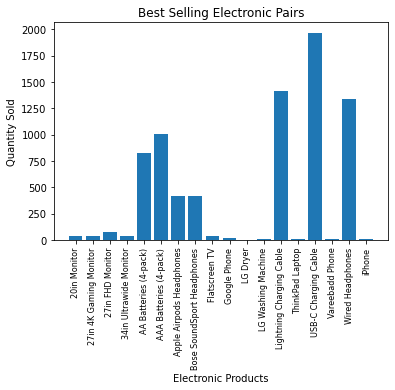

In [25]:
# Plotting bar chart for each Products
product_group = df1.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df1 in product_group]
plt.title('Best Selling Electronic Pairs')
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.xlabel('Electronic Products')
plt.ylabel('Quantity Sold')
plt.show()

C:\Users\ywjra\AppData\Local\Temp\ipykernel_149980\2779200030.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)
C:\Users\ywjra\AppData\Local\Temp\ipykernel_149980\2779200030.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


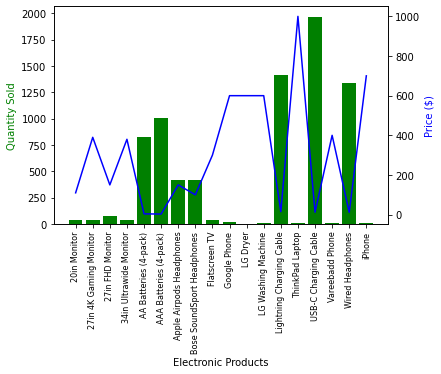

In [26]:
#Plotting bar and line chart
prices = df1.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Electronic Products')
ax1.set_ylabel('Quantity Sold', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()